## MTNOY STOCK PRICE ANALYSIS

In [1]:
import requests
import pandas as pd
from config import settings
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
#loading the dataset

df = pd.read_csv("mtnoy_dataset.csv").set_index("date")
df.index = pd.to_datetime(df.index)
df= df.sort_index(ascending=True)


In [10]:
# creating the returns columns

df["returns"] = df["close"].pct_change() * 100
df_mtnoy_return = df["returns"].dropna()

# mtnoy_50days_volatility

mtnoy_50days_volatility = df_mtnoy_return.rolling(window=50).std().dropna()

### ANALYSIS

#### MTNOY Price trend

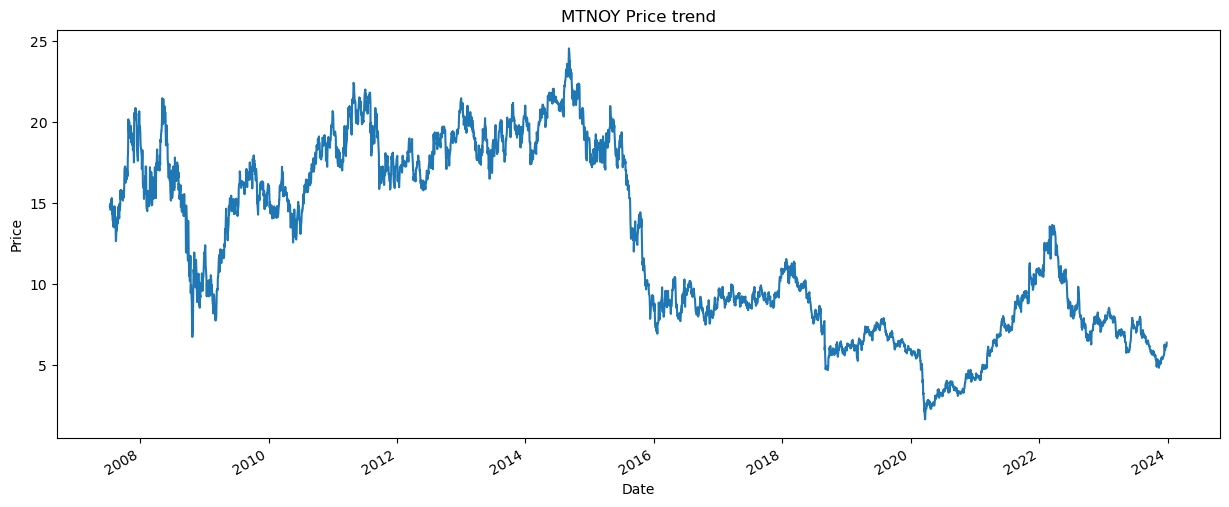

In [7]:
# plot the closing the price
fig, ax = plt.subplots(figsize=(15,6))

df["close"].plot();

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("MTNOY Price trend");

The plot shows that MTNOY reached an all-time high of about 25 dollars in 2014 and hit a low of about 2 dollars. It experienced a resurgence, reaching a new high of approximately 13 dollars during the 2020/2021 bull market but is currently facing a downward trend due to the prevailing bear market.


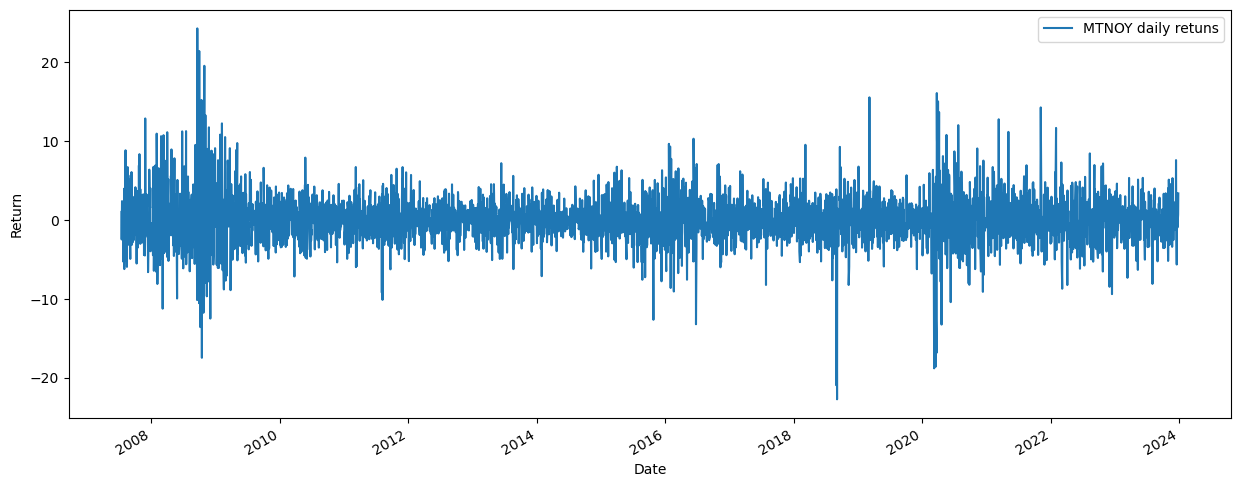

In [8]:
# PLot of MTNOY daily price volatility

fig, ax = plt.subplots(figsize=(15,6))

df_mtnoy_return.plot(ax=ax, label="MTNOY daily retuns" )

# Label axes
plt.xlabel("Date")
plt.ylabel("Return")
plt.legend();

The MTNOY daily returns chart illustrates periods of high volatility from 2008 to 2009 and 2020 to 2021, characterized by significant fluctuations in returns. In contrast, the intervening years exhibit lower volatility, indicated by more stable returns.


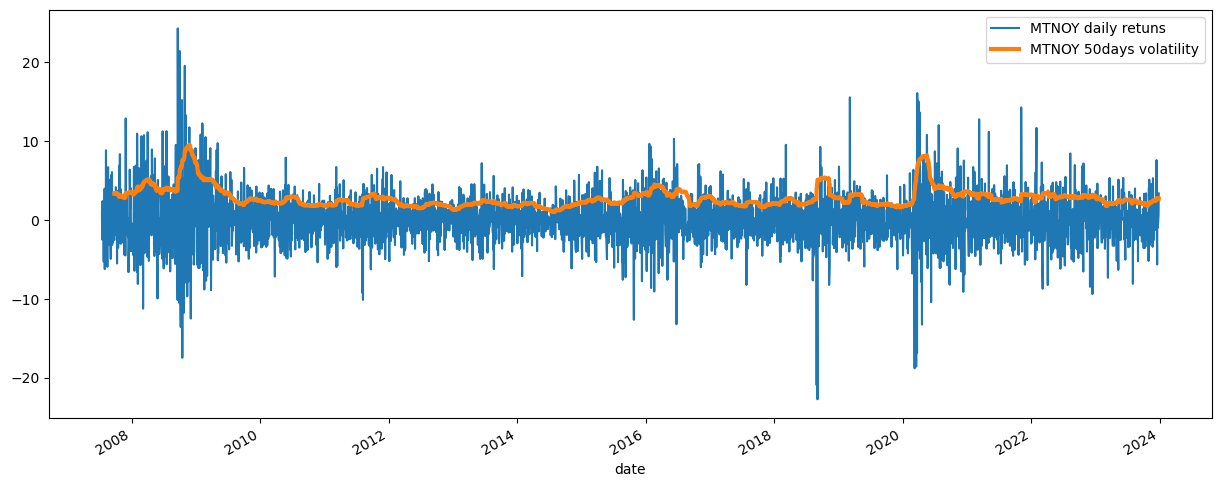

In [11]:
# PLot of MTNOY daily price volatility
fig, ax = plt.subplots(figsize=(15,6))

df_mtnoy_return.plot(ax=ax, label="MTNOY daily retuns" )

#plot mtnoy_50days_volatility

mtnoy_50days_volatility.plot(ax=ax, linewidth=3, label="MTNOY 50days volatility")

plt.legend();

As the spreads widen, the volatility, represented by the orange line (MTNOY 50days volatility), does indeed increase. When the spreads narrow down, the volatility decreases as well. 

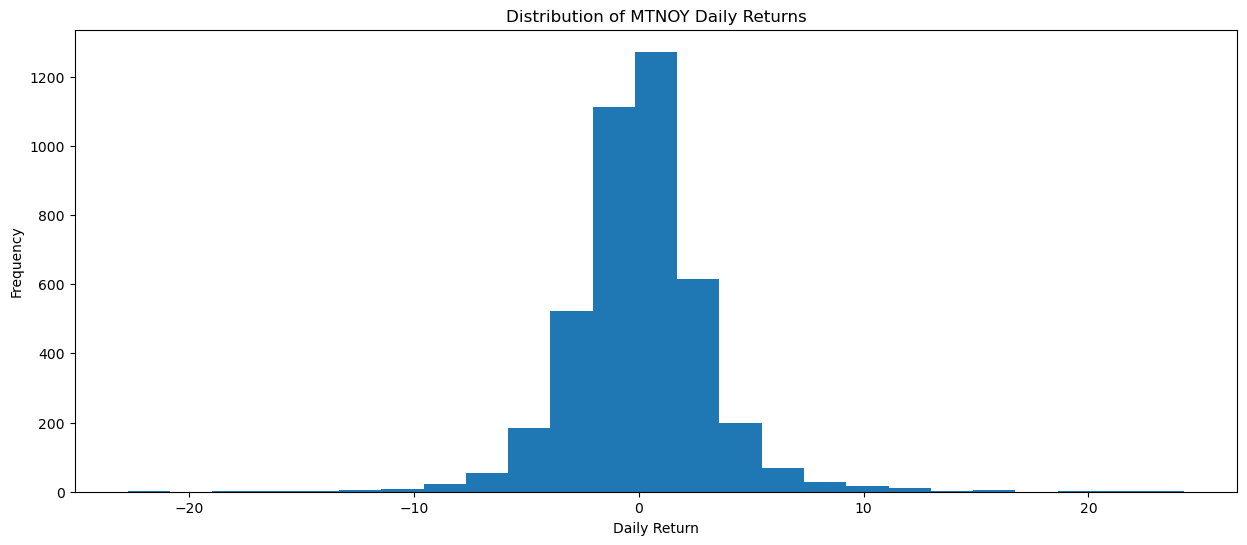

In [12]:
# Ploting the distribution of the returns
fig, ax = plt.subplots(figsize=(15,6))

plt.hist(df_mtnoy_return, bins=25);

# Add axis labels
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.title("Distribution of MTNOY Daily Returns");

The bar chart displays the unconditional volatility distribution of MTNOY daily returns. The distribution is skewed, with a higher frequency of returns near zero and noticeable peaks at approximately 10 and -10. This indicates that the mean of the distribution is centered around zero, but there are some extreme jumps in returns at both ends.
